<a href="https://colab.research.google.com/github/ReidelVichot/DSTEP23/blob/main/week_2/dstep23_matplotlib_intro1_DrDobler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **DSTEP23 // Introduction to `Matplotlib`: Part 1**

*Sep 7, 2023*

This notebook will go through an introduction to the `matplotlib` module, the most core and foundational python module for generating static visualizations.

---

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### **Basic plotting with `pandas`**

In [ ]:
# -- load NOAA
fname = "https://www.star.nesdis.noaa.gov/sod/lsa/SeaLevelRise/slr/slr_sla_gbl_free_txj1j2_90.csv"
noaa = pd.read_csv(fname, skiprows=5)

In [ ]:
# -- extract the data into separate variables
year = noaa["year"]
slev = noaa[["TOPEX/Poseidon", "Jason-1", "Jason-2", "Jason-3"]].min(axis=1)

# -- put sea level back into the original DataFrame
noaa["minlev"] = slev

<Axes: xlabel='year'>

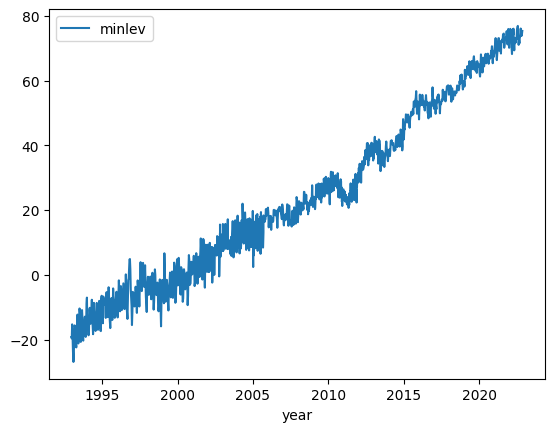

In [ ]:
# -- make a plot using pandas
noaa.plot("year", "minlev")

In [ ]:
# -- let's look at the "documentation" for this plotting function
noaa.plot?

### **Plotting with `matplotlib`**

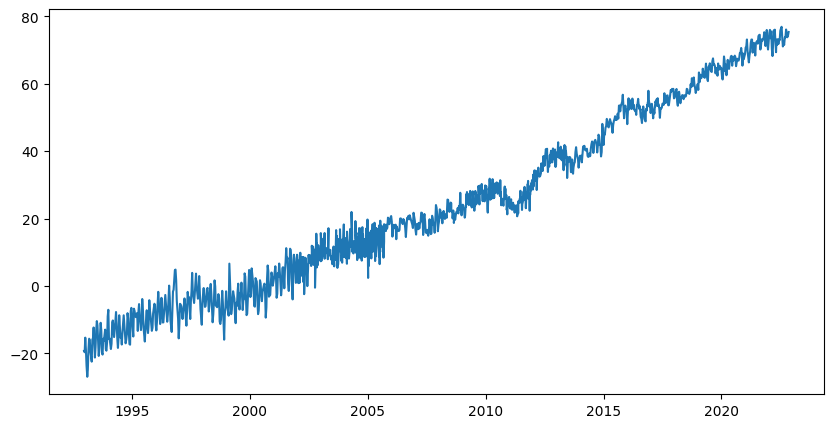

In [ ]:
# -- create a figure and axis
fig, ax = plt.subplots(figsize=(10, 5), num=314)

# -- add a line to that plot
lins = ax.plot(year, slev)

# -- show the figure
fig.show()

### **Making better plots: controlling `matplotlib` objects**

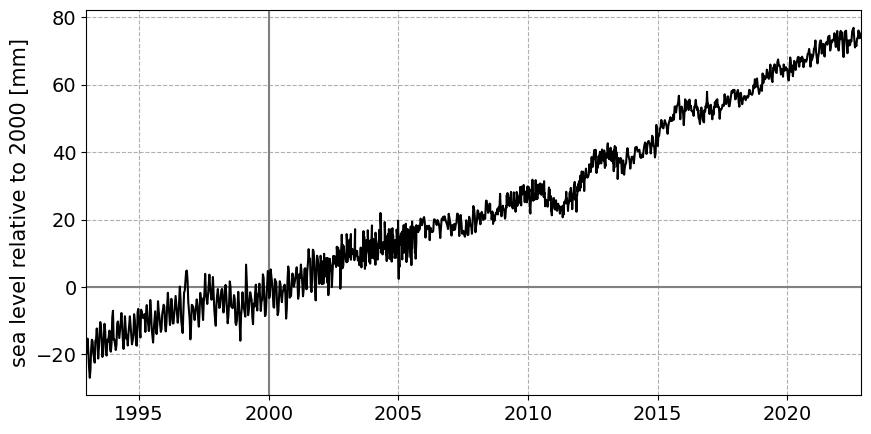

In [ ]:
# -- create a figure and axis
fig, ax = plt.subplots(figsize=(10, 5))

# -- add a line to that plot (no reason not to make the line black)
lins = ax.plot(year, slev, color="k")

# -- grid lines can help with points in the far corners of the plot
ax.grid(linestyle="--")

# -- obviously need a y-axis label
ylab = ax.set_ylabel("sea level relative to 2000 [mm]", fontsize=15)

# -- snap the xrange to the data limits
ax.set_xlim(year.min(), year.max())

# -- ticks label sizes are much too small
ax.tick_params(axis="both", labelsize=14)

# -- if we want to specifically indicate that there is a special time and level
ax.axvline(2000, color="gray")
ax.axhline(0, color="gray")
lins[0].set_zorder(3)

# -- show the figure
fig.show()

### **Creating a flexible and informative visualization**

Let's imagine we are trying to assess when New Castle Battery park will be underwater given the rate of sea level rise.  Here, we'll move beyond a linear model and use a *quadratic* model fit:

In [ ]:
# -- let's make a quadratic fit/prediction:
#    sea level = A * yr^2 + B * yr + C
pyear = np.arange(1990, 2100)
params = np.polyfit(year, slev, 2)
pred = params[0] * pyear**2 + params[1] * pyear + params[2]

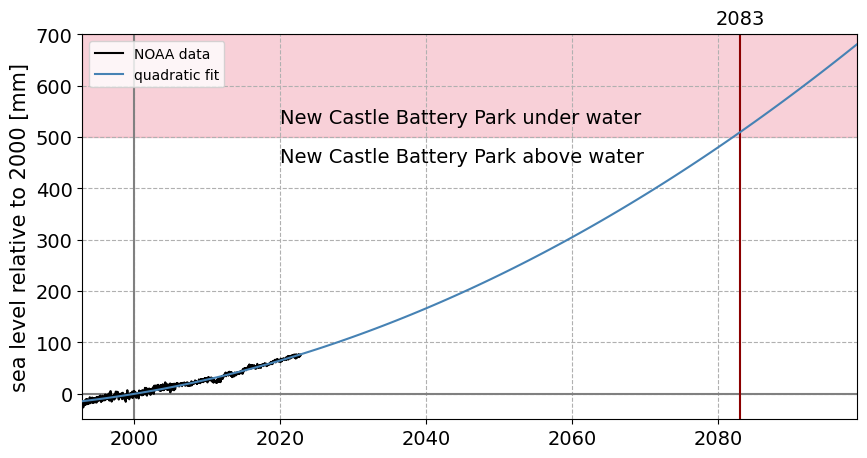

In [ ]:
# -- create a figure and axis
fig, ax = plt.subplots(figsize=[10, 5], num=314)

# -- add a line to that plot (no reason not to make the line black)
lins = ax.plot(year, slev, color="k", label="NOAA data")

# -- overplot the prediction
linsp = ax.plot(pyear, pred, color="steelblue", lw=1.5, label="quadratic fit")

# -- grid lines can help with points in the far corners of the plot
ax.grid(linestyle="--")

# -- obviously need a y-axis label
ylab = ax.set_ylabel("sea level relative to 2000 [mm]", fontsize=15)

# -- snap the xrange and yrange
ax.set_xlim(year.min(), pyear.max())
ax.set_ylim(-50, 700)

# -- ticks label sizes are much too small
ax.tick_params(axis="both", labelsize=14)

# -- if we want to specifically indicate that there is a special time and level
ax.axvline(2000, color="gray")
ax.axhline(0, color="gray")

# -- let's assume 500mm is Battery park underwater and indicate that
bpel = 500
yr = ax.get_ylim()
ax.axhspan(bpel, yr[1], color="crimson", alpha=0.2)
ax.text(2020, bpel + 20, "New Castle Battery Park under water",
        fontsize=14, ha="left", va="bottom")
ax.text(2020, bpel - 20, "New Castle Battery Park above water",
        fontsize=14, ha="left", va="top")

# -- cross line for underwater
yruw = pyear[pred >= bpel][0]
ax.axvline(yruw, color="darkred", lw=1.5)

# -- add text indicating value
ax.text(yruw, yr[1] + 20, yruw, fontsize=14, ha="center")

# -- now we need a legend
ax.legend(loc="upper left")

# -- set layered ordering
lins[0].set_zorder(5)
linsp[0].set_zorder(6)

# -- show the figure
fig.show()